# Linear regression model for predicting gross worldwide revenue for movies between 2015 and 2021.

In [687]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [284]:
movies_database1 = pd.read_csv('movies_links_filtered.csv',index_col='Unnamed: 0')
movies_database2 = pd.read_csv('movies_database_until_movie_5719.csv',index_col='Unnamed: 0')
top_1000_actors = pd.read_csv('actors.csv')

In [90]:
movies_database2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    5720 non-null   object 
 1   movie_ID                 5720 non-null   object 
 2   release_date             5720 non-null   object 
 3   release_country          5720 non-null   object 
 4   num_user_reviews         5720 non-null   object 
 5   num_critic_reviews       5085 non-null   object 
 6   total_awards_wins        2314 non-null   float64
 7   total_nominations        2623 non-null   float64
 8   oscar_wins               5720 non-null   int64  
 9   oscar_nominations        5720 non-null   int64  
 10  production_companies     5720 non-null   object 
 11  budget                   1799 non-null   object 
 12  opening_weekend_usa_can  5720 non-null   object 
 13  gross_usa_can            5720 non-null   object 
 14  gross_worldwide         

In [91]:
movies_database1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5720 non-null   object 
 1   movie_ID         5720 non-null   object 
 2   link             5720 non-null   object 
 3   MPPA             5720 non-null   object 
 4   runtime          5720 non-null   object 
 5   genre            5720 non-null   object 
 6   IMDB_rating      5720 non-null   float64
 7   number_of_votes  5720 non-null   int64  
 8   metacritic       5720 non-null   object 
 9   year_release     5720 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 491.6+ KB


# Preprocessing

In [142]:
movies_list =  pd.merge(movies_database2, movies_database1,how='left', on='movie_ID')

In [143]:
movies_list.tail()

,title_x,movie_ID,release_date,release_country,num_user_reviews,num_critic_reviews,total_awards_wins,total_nominations,oscar_wins,oscar_nominations,...,top_writer,title_y,link,MPPA,runtime,genre,IMDB_rating,number_of_votes,metacritic,year_release
5715,Keep in Touch,tt3344998,"November 4, 2016",United States,0,6,9.0,1.0,0,0,...,Michael Angelo Covino,Keep in Touch,https://www.imdb.com/title/tt3344998?ref_=fn_a...,Not Rated,105,"['Comedy', ' Drama', ' Music']",6.7,204,[],2015
5716,Eyes of the Dead,tt4685626,"August 24, 2018",United States,6,4,NaN,NaN,0,0,...,Ben Samuels,Eyes of the Dead,https://www.imdb.com/title/tt4685626?ref_=fn_a...,TV-14,83,"['Action', ' Horror', ' Thriller']",3.9,203,[],2015
5717,Bigfoot the Movie,tt4637832,"May 29, 2015",United States,14,2,NaN,NaN,0,0,...,Jared Show,Bigfoot the Movie,https://www.imdb.com/title/tt4637832?ref_=fn_a...,Not Rated,96,['Comedy'],5.6,203,[],2015
5718,Alcatraz Prison Escape: Deathbed Confession,tt1379712,"March 15, 2015",United States,9,NaN,NaN,NaN,0,0,...,John Edward Lee,Alcatraz Prison Escape: Deathbed Confession,https://www.imdb.com/title/tt1379712?ref_=fn_a...,[],93,"['Action', ' Crime']",5.2,201,[],2015
5719,Richard Peter Johnson,tt2847520,December 2015,United States,2,NaN,NaN,NaN,0,0,...,Rik Baron,Richard Peter Johnson,https://www.imdb.com/title/tt2847520?ref_=fn_a...,TV-MA,88,['Comedy'],5.1,200,[],2015


In [144]:
del movies_list['title_y']
del movies_list['link']
movies_list = movies_list.rename(columns = {'title_x':'title'})


In [145]:
movies_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    5720 non-null   object 
 1   movie_ID                 5720 non-null   object 
 2   release_date             5720 non-null   object 
 3   release_country          5720 non-null   object 
 4   num_user_reviews         5720 non-null   object 
 5   num_critic_reviews       5085 non-null   object 
 6   total_awards_wins        2314 non-null   float64
 7   total_nominations        2623 non-null   float64
 8   oscar_wins               5720 non-null   int64  
 9   oscar_nominations        5720 non-null   int64  
 10  production_companies     5720 non-null   object 
 11  budget                   1799 non-null   object 
 12  opening_weekend_usa_can  5720 non-null   object 
 13  gross_usa_can            5720 non-null   object 
 14  gross_worldwide         

In [146]:
movies_list = movies_list.replace('',np.NaN)
movies_list = movies_list.replace('[]',np.NaN)

In [147]:
movies_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    5720 non-null   object 
 1   movie_ID                 5720 non-null   object 
 2   release_date             5708 non-null   object 
 3   release_country          5708 non-null   object 
 4   num_user_reviews         5720 non-null   object 
 5   num_critic_reviews       5085 non-null   object 
 6   total_awards_wins        2314 non-null   float64
 7   total_nominations        2623 non-null   float64
 8   oscar_wins               5720 non-null   int64  
 9   oscar_nominations        5720 non-null   int64  
 10  production_companies     5385 non-null   object 
 11  budget                   1798 non-null   object 
 12  opening_weekend_usa_can  1589 non-null   object 
 13  gross_usa_can            1672 non-null   object 
 14  gross_worldwide         

In [148]:
movies_list['opening_weekend_usa_can'].replace('[]',np.NaN)
movies_list['budget'].replace('[]',np.NaN)
movies_list['gross_worldwide'].replace('[]',np.NaN)


0       $1074419384
1       $2797501328
2        $374565754
3        $311605581
4       $1128462972
           ...     
5715            NaN
5716            NaN
5717            NaN
5718            NaN
5719            NaN
Name: gross_worldwide, Length: 5720, dtype: object

In [155]:
def removeDolarSign(row): 
    if type(row) != float:
        row = row.replace('$', '')
        if '€' in row:
            row = row.replace('€', '').strip()
            row = str(int(row)*1.17)
        if 'CA' in row:
            row = row.replace('CA', '').strip()
            row = str(int(row)*0.79) 
        if '₹' in row:
            row = row.replace('₹', '').strip()
            row = str(int(row)*0.01) 
        if 'created' in row or 'May' in row:
            row = np.NaN
        if '£' in row:
            row = row.replace('£', '').strip()
            row = str(int(row)*1.3462)
            
            
#     if ~row.isnan():
#         int(row)
    return row

movies_list['budget'] = movies_list['budget'].apply(removeDolarSign)

In [156]:
movies_list['opening_weekend_usa_can'] = movies_list['opening_weekend_usa_can'].apply(removeDolarSign)
movies_list['gross_usa_can'] = movies_list['gross_usa_can'].apply(removeDolarSign)
movies_list['gross_worldwide'] = movies_list['gross_worldwide'].apply(removeDolarSign)


In [480]:
movies_list_filter1  = movies_list[~movies_list['gross_worldwide'].isna()].copy()
movies_list_filter1  = movies_list_filter1[~movies_list_filter1['opening_weekend_usa_can'].isna()].copy()
movies_list_filter1  = movies_list_filter1[~movies_list_filter1['budget'].isna()].copy()

In [481]:
movies_list_filter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 5692
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    914 non-null    object 
 1   movie_ID                 914 non-null    object 
 2   release_date             914 non-null    object 
 3   release_country          914 non-null    object 
 4   num_user_reviews         914 non-null    object 
 5   num_critic_reviews       907 non-null    object 
 6   total_awards_wins        617 non-null    float64
 7   total_nominations        774 non-null    float64
 8   oscar_wins               914 non-null    int64  
 9   oscar_nominations        914 non-null    int64  
 10  production_companies     913 non-null    object 
 11  budget                   914 non-null    object 
 12  opening_weekend_usa_can  914 non-null    object 
 13  gross_usa_can            914 non-null    object 
 14  gross_worldwide          

In [482]:
movies_list_filter1['budget'] = pd.to_numeric(movies_list_filter1['budget'])
movies_list_filter1['opening_weekend_usa_can'] = pd.to_numeric(movies_list_filter1['opening_weekend_usa_can'])
movies_list_filter1['gross_usa_can'] = pd.to_numeric(movies_list_filter1['gross_usa_can'])
movies_list_filter1['gross_worldwide'] = pd.to_numeric(movies_list_filter1['gross_worldwide'])
movies_list_filter1['metacritic'] = pd.to_numeric(movies_list_filter1['metacritic'])
movies_list_filter1['IMDB_rating'] = pd.to_numeric(movies_list_filter1['IMDB_rating'])
movies_list_filter1['runtime'] = pd.to_numeric(movies_list_filter1['runtime'])
movies_list_filter1['oscar_nominations'] = pd.to_numeric(movies_list_filter1['oscar_nominations'])
movies_list_filter1['oscar_wins'] = pd.to_numeric(movies_list_filter1['oscar_wins'])
movies_list_filter1['oscar_nominations'] = pd.to_numeric(movies_list_filter1['oscar_nominations'])
movies_list_filter1['total_nominations'] = pd.to_numeric(movies_list_filter1['total_awards_wins'])




In [483]:
movies_list_filter1 = movies_list_filter1.drop_duplicates()

In [484]:
movies_list_filter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 5692
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    914 non-null    object 
 1   movie_ID                 914 non-null    object 
 2   release_date             914 non-null    object 
 3   release_country          914 non-null    object 
 4   num_user_reviews         914 non-null    object 
 5   num_critic_reviews       907 non-null    object 
 6   total_awards_wins        617 non-null    float64
 7   total_nominations        617 non-null    float64
 8   oscar_wins               914 non-null    int64  
 9   oscar_nominations        914 non-null    int64  
 10  production_companies     913 non-null    object 
 11  budget                   914 non-null    float64
 12  opening_weekend_usa_can  914 non-null    int64  
 13  gross_usa_can            914 non-null    int64  
 14  gross_worldwide          

In [790]:
top_1000_actors.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)


In [486]:
top_1000_actors = top_1000_actors.rename(columns = {'Names':'top_star'})
top_1000_actors.head()

,top_star,is_top_actor
0,Robert De Niro,1
1,Jack Nicholson,1
2,Marlon Brando,1
3,Denzel Washington,1
4,Katharine Hepburn,1


In [487]:
top_1000_actors['is_top_actor'] = 1

In [488]:
top_1000_actors.head()

,top_star,is_top_actor
0,Robert De Niro,1
1,Jack Nicholson,1
2,Marlon Brando,1
3,Denzel Washington,1
4,Katharine Hepburn,1


In [489]:
movies_list_filter1 = pd.merge(movies_list_filter1, top_1000_actors,how='left', on='top_star')

In [490]:
movies_list_filter1.tail()

,title,movie_ID,release_date,release_country,num_user_reviews,num_critic_reviews,total_awards_wins,total_nominations,oscar_wins,oscar_nominations,...,top_star,top_writer,MPPA,runtime,genre,IMDB_rating,number_of_votes,metacritic,year_release,is_top_actor
909,L.A. Slasher,tt2735292,"June 28, 2016",United States,8,22,NaN,NaN,0,0,...,Andy Dick,Martin Owen,R,84,"['Comedy', ' Crime', ' Drama']",3.3,837,NaN,2015,NaN
910,The Dark Below,tt3591696,"March 10, 2017",United States,11,21,NaN,NaN,0,0,...,Lauren Mae Shafer,Douglas Schulze,Unrated,75,"['Horror', ' Thriller']",4.2,836,NaN,2015,NaN
911,Ladrones,tt4296800,"October 9, 2015",United States,7,4,1.0,1.0,0,0,...,Fernando Colunga,Jon Molerio,PG-13,97,['Comedy'],5.1,297,NaN,2015,NaN
912,Voiceless,tt2603600,2015,United States,16,3,6.0,6.0,0,0,...,Rusty Joiner,Pat Necerato,PG-13,107,"['Drama', ' Thriller']",2.1,249,NaN,2015,NaN
913,Windsor Drive,tt2311428,"August 28, 2015",United States,7,7,NaN,NaN,0,0,...,Samaire Armstrong,T.R. Gough,Not Rated,90,"['Mystery', ' Thriller']",3.1,221,NaN,2015,NaN


In [491]:
movies_list_filter1['is_top_actor'].replace(np.NaN,0,inplace=True)


In [492]:
movies_list_filter1.tail()

,title,movie_ID,release_date,release_country,num_user_reviews,num_critic_reviews,total_awards_wins,total_nominations,oscar_wins,oscar_nominations,...,top_star,top_writer,MPPA,runtime,genre,IMDB_rating,number_of_votes,metacritic,year_release,is_top_actor
909,L.A. Slasher,tt2735292,"June 28, 2016",United States,8,22,NaN,NaN,0,0,...,Andy Dick,Martin Owen,R,84,"['Comedy', ' Crime', ' Drama']",3.3,837,NaN,2015,0.0
910,The Dark Below,tt3591696,"March 10, 2017",United States,11,21,NaN,NaN,0,0,...,Lauren Mae Shafer,Douglas Schulze,Unrated,75,"['Horror', ' Thriller']",4.2,836,NaN,2015,0.0
911,Ladrones,tt4296800,"October 9, 2015",United States,7,4,1.0,1.0,0,0,...,Fernando Colunga,Jon Molerio,PG-13,97,['Comedy'],5.1,297,NaN,2015,0.0
912,Voiceless,tt2603600,2015,United States,16,3,6.0,6.0,0,0,...,Rusty Joiner,Pat Necerato,PG-13,107,"['Drama', ' Thriller']",2.1,249,NaN,2015,0.0
913,Windsor Drive,tt2311428,"August 28, 2015",United States,7,7,NaN,NaN,0,0,...,Samaire Armstrong,T.R. Gough,Not Rated,90,"['Mystery', ' Thriller']",3.1,221,NaN,2015,0.0


In [493]:
########

In [494]:
movies_list_filter2 = movies_list_filter1.iloc[:,[11,12,19,25,14]].copy()
movies_list_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 913
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   budget                   914 non-null    float64
 1   opening_weekend_usa_can  914 non-null    int64  
 2   runtime                  914 non-null    int64  
 3   is_top_actor             914 non-null    float64
 4   gross_worldwide          914 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 42.8 KB


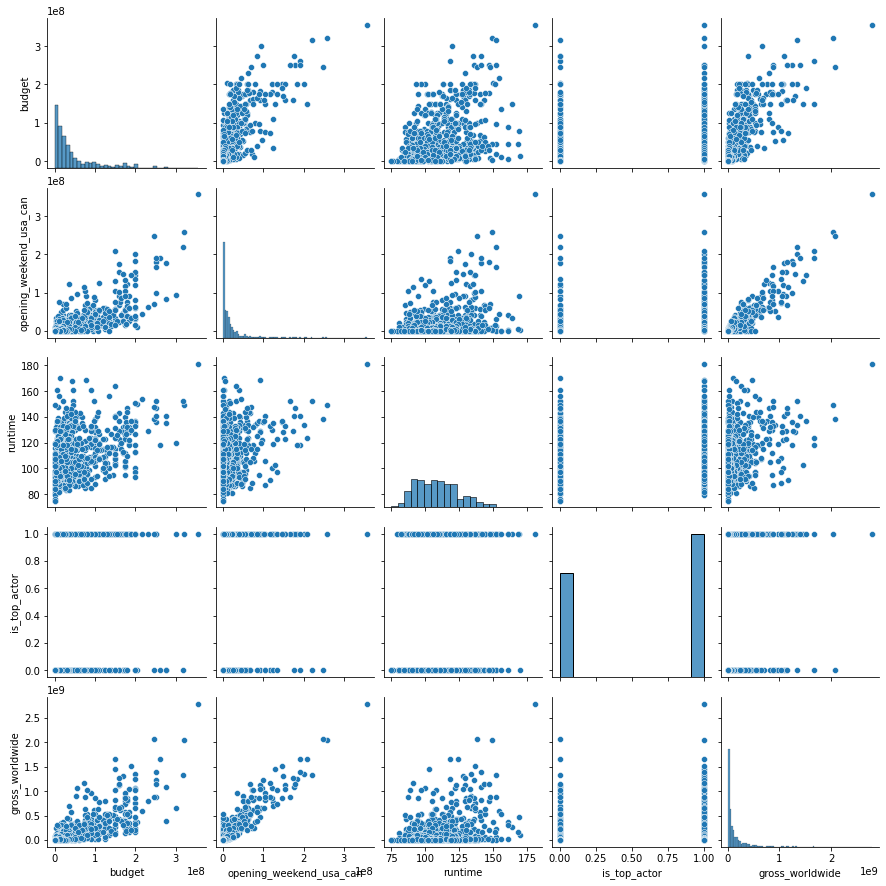

In [495]:
sns.pairplot(movies_list_filter2)



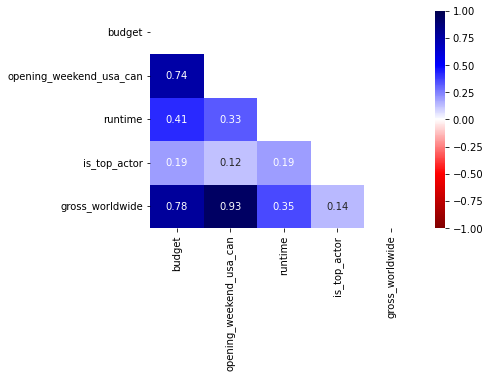

In [496]:
upper = np.triu(movies_list_filter2.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(movies_list_filter2.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

In [472]:
combinations_genres = movies_list_filter1['genre'].value_counts()

pandas.core.series.Series

In [458]:
#### GENRE: 

In [497]:
# Genre:
def str_to_lists(row):
    row = re.sub("[^\w]", " ",  row).split()
    return row 
            
movies_list_filter1['genre'] = movies_list_filter1['genre'].apply(str_to_lists)

In [498]:
df_dummy_genre = movies_list_filter1['genre'].str.join('|').str.get_dummies()

In [535]:
df_dummy_genre.sum().sort_values(ascending = False)

Drama        457
Comedy       319
Action       302
Adventure    252
Crime        148
Thriller     136
Biography    119
Horror       119
Romance       93
Mystery       91
Fi            88
Sci           88
Animation     82
Fantasy       75
Family        42
History       40
Music         23
Sport         21
War           12
Western       10
Musical        7
dtype: int64

<AxesSubplot:>

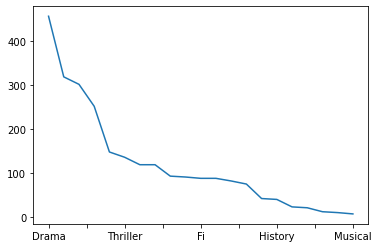

In [536]:
df_dummy_genre.sum().sort_values(ascending = False).plot()

In [554]:
type(movies_list_filter1['genre'][0][1])

str

In [558]:
def assign_other_genre(row):
    top_genre = ['Drama', 'Comedy', 'Action', 'Adventure','Crime']
    updated_row = []
    for i in range(len(row)):
        if row[i] not in top_genre:
            updated_row.append('Other')
        else:
            updated_row.append(row[i])
            
    return updated_row
            
movies_list_filter1['genre_updated'] = movies_list_filter1['genre'].apply(assign_other_genre)

In [556]:
movies_list_filter1['genre']

0          [Crime, Drama, Thriller]
1        [Action, Adventure, Drama]
2                   [Comedy, Drama]
3            [Comedy, Crime, Drama]
4      [Action, Adventure, Sci, Fi]
                   ...             
909          [Comedy, Crime, Drama]
910              [Horror, Thriller]
911                        [Comedy]
912               [Drama, Thriller]
913             [Mystery, Thriller]
Name: genre, Length: 914, dtype: object

In [559]:
movies_list_filter1['genre_updated']

0                  [Crime, Drama, Other]
1             [Action, Adventure, Drama]
2                        [Comedy, Drama]
3                 [Comedy, Crime, Drama]
4      [Action, Adventure, Other, Other]
                     ...                
909               [Comedy, Crime, Drama]
910                       [Other, Other]
911                             [Comedy]
912                       [Drama, Other]
913                       [Other, Other]
Name: genre_updated, Length: 914, dtype: object

In [560]:
# Dummy genre_updated:
df_dummy_genre_updated = movies_list_filter1['genre_updated'].str.join('|').str.get_dummies()
df_dummy_genre_updated.sum().sort_values(ascending = False)

Other        698
Drama        457
Comedy       319
Action       302
Adventure    252
Crime        148
dtype: int64

In [561]:
# merge dummy_df with original df
movies_list_filter1 = movies_list_filter1.merge(df_dummy_genre_updated, left_index=True, right_index=True).reset_index()

In [567]:
# drop column no longer needed
movies_list_filter1.drop(['genre'], axis=1, inplace=True)
movies_list_filter1.drop(['genre_updated'], axis=1, inplace=True)

In [562]:
movies_list_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    914 non-null    int64  
 1   title                    914 non-null    object 
 2   movie_ID                 914 non-null    object 
 3   release_date             914 non-null    object 
 4   release_country          914 non-null    object 
 5   num_user_reviews         914 non-null    object 
 6   num_critic_reviews       907 non-null    object 
 7   total_awards_wins        617 non-null    float64
 8   total_nominations        617 non-null    float64
 9   oscar_wins               914 non-null    int64  
 10  oscar_nominations        914 non-null    int64  
 11  production_companies     913 non-null    object 
 12  budget                   914 non-null    float64
 13  opening_weekend_usa_can  914 non-null    int64  
 14  gross_usa_can            9

In [564]:
df_dummy_MPPA = movies_list_filter3['MPPA'].str.get_dummies()
movies_list_filter1 = movies_list_filter1.merge(df_dummy_MPPA, left_index=True, right_index=True).reset_index()

In [565]:
movies_list_filter1.drop(['MPPA'], axis=1, inplace=True)

In [568]:
movies_list_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   level_0                  914 non-null    int64  
 1   index                    914 non-null    int64  
 2   title                    914 non-null    object 
 3   movie_ID                 914 non-null    object 
 4   release_date             914 non-null    object 
 5   release_country          914 non-null    object 
 6   num_user_reviews         914 non-null    object 
 7   num_critic_reviews       907 non-null    object 
 8   total_awards_wins        617 non-null    float64
 9   total_nominations        617 non-null    float64
 10  oscar_wins               914 non-null    int64  
 11  oscar_nominations        914 non-null    int64  
 12  production_companies     913 non-null    object 
 13  budget                   914 non-null    float64
 14  opening_weekend_usa_can  9

In [ ]:
13,20,25,26,27,28,29,30,32,35,36,16

In [569]:
## BASELINE MODEL:

movies_baseline_features = movies_list_filter1.iloc[:,[13,14,25,20,16]].copy()
movies_baseline_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   budget                   914 non-null    float64
 1   opening_weekend_usa_can  914 non-null    int64  
 2   is_top_actor             914 non-null    float64
 3   runtime                  914 non-null    int64  
 4   gross_worldwide          914 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 35.8 KB


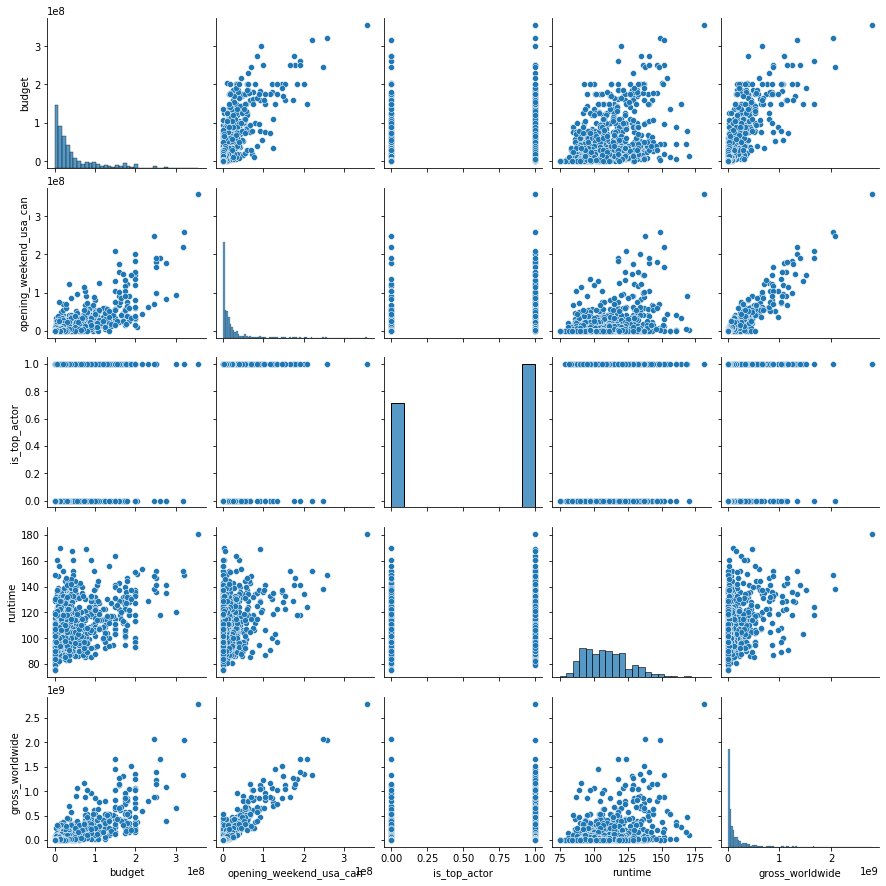

In [570]:
sns.pairplot(movies_baseline_features)

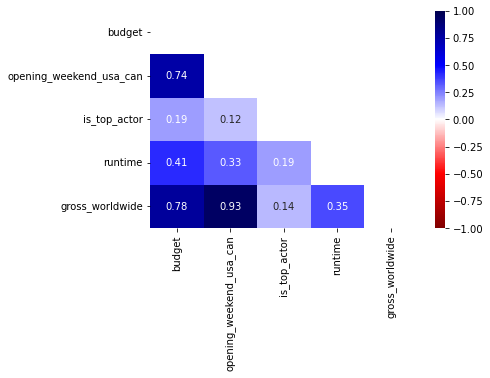

In [571]:
upper = np.triu(movies_baseline_features.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(movies_baseline_features.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

In [581]:
from sklearn.metrics import r2_score

In [579]:
X_train, X_test, y_train, y_test = train_test_split(movies_baseline_features[['is_top_actor','budget','opening_weekend_usa_can','runtime']], movies_baseline_features['gross_worldwide'], test_size=0.33, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)
m.score(X_test,y_test)
print(m.score(X_train,y_train))


0.8961169056786467


In [584]:
r2 = m.score(X_test, y_test)
# n = len(movies_list_filter3['gross_worldwide'])
# k = len(X_train.columns)
# R2_adj = R_adjusted(r2, n, k)
print(r2)

0.8760684861664041


In [ ]:
# Cross-validate with k-fold.

In [586]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(movies_baseline_features[['is_top_actor','budget','opening_weekend_usa_can','runtime']], movies_baseline_features['gross_worldwide'], test_size=.2, random_state=10)

In [589]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 242 to 576
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_top_actor             183 non-null    float64
 1   budget                   183 non-null    float64
 2   opening_weekend_usa_can  183 non-null    int64  
 3   runtime                  183 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 7.1 KB


In [ ]:
# CROSS-VALIDATION:

In [590]:
from sklearn.model_selection import KFold

X, X_test, y, y_test = train_test_split(movies_baseline_features[['is_top_actor','budget','opening_weekend_usa_can','runtime']], movies_baseline_features['gross_worldwide'], test_size=.2, random_state=10)

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [595]:
# run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] # collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val).round(3))
    
#     #ridge with feature scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
#     lm_reg.fit(X_train_scaled, y_train)
#     cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val).round(3))

print(f'Simple scores: \t{cv_lm_r2s}')
# print(f'Ridge scores: \t{cv_lm_reg_r2s} \n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
# print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Test cv r^2: {lm.score(X_test, y_test):.3f}')
 

Simple scores: 	[0.862, 0.837, 0.932, 0.864, 0.825]
Simple mean cv r^2: 0.864 +- 0.037
Test cv r^2: 0.926


In [ ]:

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.regplot(x=preds, y=y_test,color="g",scatter_kws={'alpha':0.3})
plt.tight_layout()

plt.title('Predicted vs Actual worldwide revenue',fontsize=18,pad=20)
# plt.xlim(0,3*1e9)
# plt.ylim(0,3*1e9)

plt.xlabel('Predicted Gross worldwide revenue ($ billions)',fontsize=16)
plt.ylabel('Actual Gross worldwide revenue ($ billions)',fontsize=18);
plt.savefig('PredictedVsActualWorldwideRevenue_1.png', dpi=500,bbox_inches = 'tight')



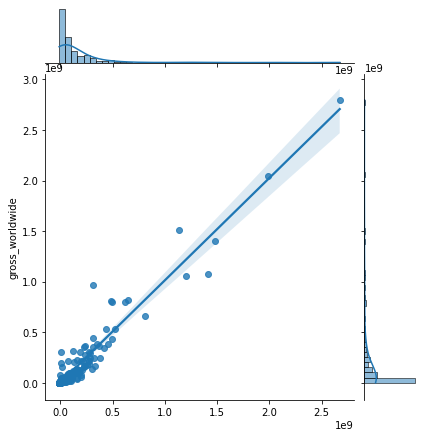

In [610]:
preds = lm.predict(X_test)
sns.jointplot(x=preds,y=y_test, kind='reg')

In [609]:
len(preds)

183

In [611]:
actuals = y_test 

In [612]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(actuals,preds)

50254504.192247815

In [447]:
# OK. Vamos a ver aquí que hacemos:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(movies_baseline_features[['is_top_actor','budget','opening_weekend_usa_can','runtime']], movies_baseline_features['gross_worldwide'], test_size=0.33, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)
m.score(X_test,y_test)
print(m.score(X_train,y_train))



In [ ]:
r2 = m.score(X_test, y_test)
# n = len(movies_list_filter3['gross_worldwide'])
# k = len(X_train.columns)
# R2_adj = R_adjusted(r2, n, k)
print(r2)

In [725]:
# UPDATED MODELS, without BOX OFFICE:

In [726]:
# BASELINE MODEL:

In [727]:
movies_without_opening = movies_list_filter1.iloc[:,[13,25,20,16]].copy()
movies_without_opening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           914 non-null    float64
 1   is_top_actor     914 non-null    float64
 2   runtime          914 non-null    int64  
 3   gross_worldwide  914 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.7 KB


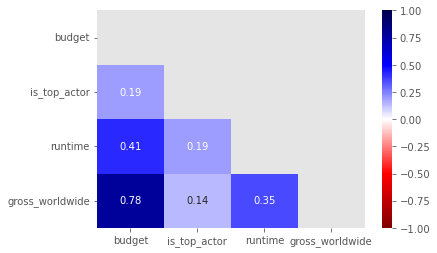

In [760]:
upper = np.triu(movies_without_opening.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(movies_without_opening.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);
plt.savefig('Heatmap_chosen_LR_model.png', dpi=500,bbox_inches = 'tight')




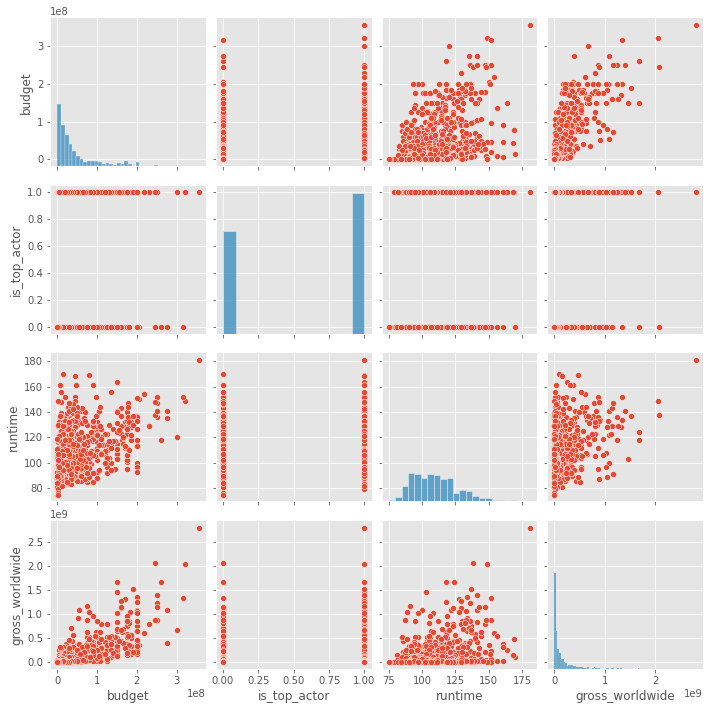

In [762]:
sns.pairplot(movies_without_opening)
plt.savefig('pairplot_chosen_LR_model.png', dpi=500,bbox_inches = 'tight')


In [729]:
def R_adjusted(r2, n, k):
    return 1-((1-r2)*(n-1))/(n-k-1)

In [784]:
X_train, X_test, y_train, y_test = train_test_split(movies_without_opening[['is_top_actor','budget','runtime']], movies_baseline_features['gross_worldwide'], test_size=0.33, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)
m.score(X_test,y_test)
r2 = m.score(X_train,y_train)
print(m.score(X_train,y_train))



0.6098093237621104


In [731]:
movies_without_opening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           914 non-null    float64
 1   is_top_actor     914 non-null    float64
 2   runtime          914 non-null    int64  
 3   gross_worldwide  914 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.7 KB


In [785]:
n = len(y_test)
k = len(X_test.columns)
r2_test = m.score(X_test,y_test)
R2_adj_test = R_adjusted(r2_test, n, k)
print(r2_test)

0.6023474193442016


In [786]:
print(R2_adj_test)

0.5983442054449821


In [ ]:
n = len(y_train)
k = len(X_train.columns)
R2_adj = R_adjusted(r2, n, k)
print(R2_adj)

In [ ]:
# Cross-validate k-fold

In [733]:
from sklearn.model_selection import KFold
X_baseline, X_test_baseline, y_baseline, y_test_baseline  = train_test_split(movies_without_opening[['is_top_actor','budget','runtime']],movies_baseline_features['gross_worldwide'], test_size=.2, random_state=10)

# this helps with the way kf will generate indices below
X_baseline, y_baseline = np.array(X_baseline), np.array(y_baseline)

In [754]:
# run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s = [] # collect the validation results for both models

for train_ind, val_ind in kf.split(X_baseline,y_baseline):
    
    X_train_baseline, y_train_baseline = X_baseline[train_ind], y_baseline[train_ind]
    X_val_baseline, y_val_baseline = X_baseline[val_ind], y_baseline[val_ind] 
    
    # Simple linear regression
    lm = LinearRegression()

    lm.fit(X_train_baseline, y_train_baseline)
    cv_lm_r2s.append(lm.score(X_val_baseline, y_val_baseline).round(3))
    

print(f'Simple scores: \t{cv_lm_r2s}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')


Simple scores: 	[0.598, 0.553, 0.589, 0.49, 0.584]
Simple mean cv r^2: 0.563 +- 0.039


In [755]:
preds_baseline = lm.predict(X_test_baseline)
actuals_baseline = y_test_baseline

In [756]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(actuals_baseline,preds_baseline)

94555080.57341363

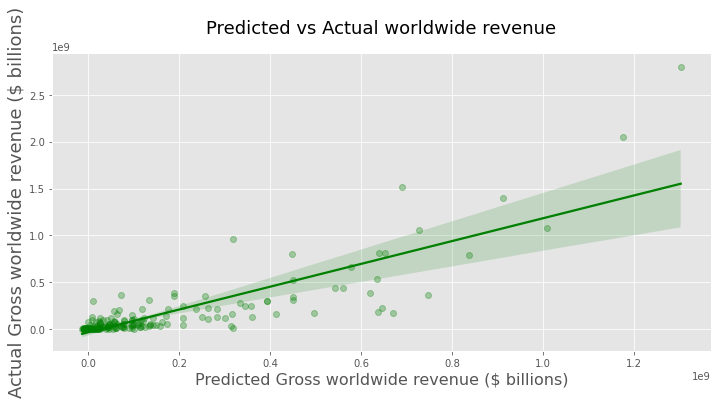

In [758]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.regplot(x=preds_baseline, y=actuals_baseline,color="g",scatter_kws={'alpha':0.3})
plt.tight_layout()

plt.title('Predicted vs Actual worldwide revenue',fontsize=18,pad=20)
# plt.xlim(0,3*1e9)
# plt.ylim(0,3*1e9)

plt.xlabel('Predicted Gross worldwide revenue ($ billions)',fontsize=16)
plt.ylabel('Actual Gross worldwide revenue ($ billions)',fontsize=18);
plt.savefig('PredictedVsActualWorldwideRevenue_1.png', dpi=100,bbox_inches = 'tight')




In [765]:
chosen_model = 

In [770]:
len(actuals_baseline)

183

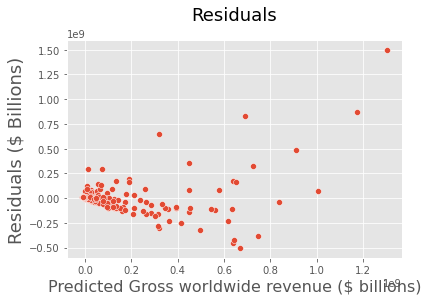

In [782]:
# create residual plot

ax = sns.scatterplot(x=preds_baseline, y=(actuals_baseline-preds_baseline))
plt.title('Residuals',fontsize=18,pad=20)

plt.xlabel('Predicted Gross worldwide revenue ($ billions)',fontsize=16)
plt.ylabel('Residuals ($ Billions)',fontsize=18);

plt.savefig('residuals_chosen_model.png', dpi=500,bbox_inches = 'tight')


# ax = sns.axhline(1.25)
# plt.plot([0, 0], [0, 0], linewidth=2)



In [737]:
## EXTENDED MODEL (ADDED FEATURES):

In [738]:
movies_extended_features_X = movies_list_filter1.iloc[:,[13,20,25,26,27,28,29,30,32,35,36]].copy()
movies_extended_features_X.info()
movies_extended_features_Y = movies_list_filter1.iloc[:,16].copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        914 non-null    float64
 1   runtime       914 non-null    int64  
 2   is_top_actor  914 non-null    float64
 3   Action        914 non-null    int64  
 4   Adventure     914 non-null    int64  
 5   Comedy        914 non-null    int64  
 6   Crime         914 non-null    int64  
 7   Drama         914 non-null    int64  
 8   G             914 non-null    int64  
 9   PG-13         914 non-null    int64  
 10  R             914 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 78.7 KB


In [787]:
X_train, X_test, y_train, y_test = train_test_split(movies_extended_features_X,movies_extended_features_Y, test_size=0.33, random_state=42)


m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)
m.score(X_test,y_test)
r2 = m.score(X_train,y_train)
print(m.score(X_train,y_train))



0.6214666432391952


In [788]:
R2_test_extended = m.score(X_test,y_test)
n = len(y_train)
k = len(X_train.columns)
R2_adj_extended = R_adjusted(R2_test_extended, n, k)
print(R2_adj_extended)


0.5940812579574852


In [789]:
R2_test_extended = m.score(X_test,y_test)
print(R2_test_extended)

0.6013891240171705


In [ ]:
R2_adj = R_adjusted(r2, n, k)
print(R2_adj)

In [743]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV



In [744]:
from sklearn.model_selection import KFold
X, X_test, y, y_test  = train_test_split(movies_extended_features_X,movies_extended_features_Y, test_size=.2, random_state=10)

# this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [749]:
# run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_Lasso_r2s = [], [] # collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # Simple linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val).round(3))
    


print(f'Simple scores: \t{cv_lm_r2s}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

 

Simple scores: 	[0.604, 0.571, 0.553, 0.481, 0.584]
Simple mean cv r^2: 0.559 +- 0.042


In [751]:
m = LinearRegression()
m.fit(X,y)
m.score(X,y)
m.score(X_test,y_test)
r2 = m.score(X,y)
print(m.score(X,y))



0.5877566662398298


In [752]:
n = len(y)
k = 11
R2_adj = R_adjusted(r2, n, k)
print(R2_adj)

0.5814497445828593


In [753]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(actuals,preds)

98442623.08557583

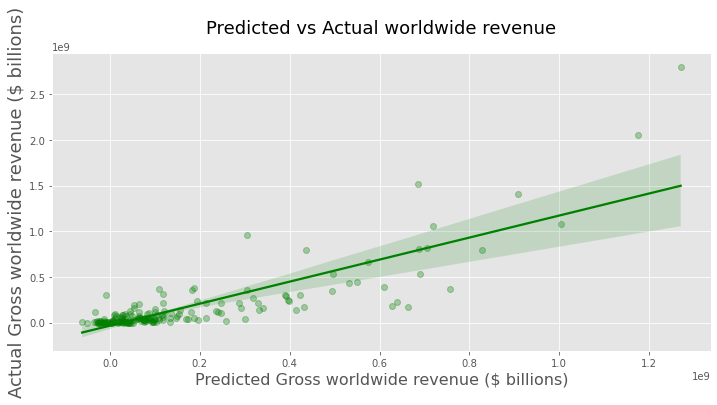

In [681]:

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.regplot(x=preds, y=y_test,color="g",scatter_kws={'alpha':0.3})
plt.tight_layout()

plt.title('Predicted vs Actual worldwide revenue',fontsize=18,pad=20)
# plt.xlim(0,3*1e9)
# plt.ylim(0,3*1e9)

plt.xlabel('Predicted Gross worldwide revenue ($ billions)',fontsize=16)
plt.ylabel('Actual Gross worldwide revenue ($ billions)',fontsize=18);
plt.savefig('PredictedVsActualWorldwideRevenue_extended.png', dpi=100,bbox_inches = 'tight')



In [696]:
# create residual plot
movie['predict']=lm.fit.predict(X_test)
movie['resid']= y_test-movie.predict
with sns.axes_style('white'):
    plot = movie.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))
    
    
    

AttributeError: 'function' object has no attribute 'predict'

###### actuals = y_test
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(actuals,preds)

In [623]:
# Adding new features:

In [624]:
movies_extended_features = movies_list_filter1.iloc[:,[13,20,25,26,27,28,29,30,32,35,36,16]].copy()
movies_extended_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           914 non-null    float64
 1   runtime          914 non-null    int64  
 2   is_top_actor     914 non-null    float64
 3   Action           914 non-null    int64  
 4   Adventure        914 non-null    int64  
 5   Comedy           914 non-null    int64  
 6   Crime            914 non-null    int64  
 7   Drama            914 non-null    int64  
 8   G                914 non-null    int64  
 9   PG-13            914 non-null    int64  
 10  R                914 non-null    int64  
 11  gross_worldwide  914 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 85.8 KB
